In [507]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("Jqka7RaOKJvTC6iABC") as me:    
    
    # Structure for material id
    pars = CifParser("mp9368.cif")
    struct = pars.get_structures()[0]
    spg = SpacegroupAnalyzer(struct)
    
    bs = me.get_bandstructure_by_material_id("mp-9368")
    band = Image(filename='band_struct.png')
    
    bsp = BSPlotter(bs)
    data = bsp.bs_plot_data() #données du graphe

# 1. Bande interdite

In [508]:
# Détermination de la bande interdite
gap = bs.get_band_gap() #informations du gap
print("La structure de bandes électroniques provenant du Materials Project est représentée à la section suivante.")
if gap['direct'] == True :
    print("On observe une bande interdite directe.")
if gap['direct'] == False :
    print("On observe une bande interdite indirecte.")
print("L’énergie de la bande interdite est de",gap['energy'],"eV.")
print("Le vecteur de transition est",gap['transition'],".")

La structure de bandes électroniques provenant du Materials Project est représentée à la section suivante.
On observe une bande interdite indirecte.
L’énergie de la bande interdite est de 2.3680000000000003 eV.
Le vecteur de transition est \Gamma-F .


# 2. Dispersion minimale et maximale dans la première bande de conduction et dernière bande de valence

In [509]:
# Le calcul des dispersions les plus faibles et fortes des bandes de conduction et de valence consiste à calculer
# les pentes minimales et maximales de ces mêmes bandes.

In [510]:
# Minimum et maximum de la dernière bande de valence
minim = 10
maxim = 0
le = len(((data["ticks"]))["distance"])
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m=0
for j in range (0,le):
    d = (data["ticks"])["distance"][j]
    if (m<9 and d != a[m]):
        a[m+1] = d
        m=m+1
    j = j+1
le2 = len(((data["ticks"]))["label"])
a2 = ["","","","","","","","","",""]
n=0
for k in range (1,le2):
    d2 = (data["ticks"])["label"][k]
    if n==0 :
        a2[0]=(data["ticks"])["label"][0]
        n=1
    if (n<10 and d2 != a2[n-1]):
        a2[n] = d2
        n=n+1
    k = k+1
for i in range (0,9):
    l = len(data.get("energy")[i].get("1")[14])
    y0 = data.get("energy")[i].get("1")[14][0]
    y1 = data.get("energy")[i].get("1")[14][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
print("La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", minim, "et pour direction :", a2[e], "-", a2[e+1],".")
print("La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", maxim, "et pour direction :", a2[c], "-", a2[c+1],".")

La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 0.21776311040004978 et pour direction : Z - $\Gamma$ .
La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 1.0681426438242605 et pour direction : $B_1$$\mid$B - Z .


In [511]:
# Minimum et maximum de la première bande de conduction
minim = 10
maxim = 0
le = len(((data["ticks"]))["distance"])
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m=0
for j in range (0,le):
    d = (data["ticks"])["distance"][j]
    if (m<9 and d != a[m]):
        a[m+1] = d
        m=m+1
    j = j+1
le2 = len(((data["ticks"]))["label"])
a2 = ["","","","","","","","","",""]
n=0
for k in range (1,le2):
    d2 = (data["ticks"])["label"][k]
    if n==0 :
        a2[0]=(data["ticks"])["label"][0]
        n=1
    if (n<10 and d2 != a2[n-1]):
        a2[n] = d2
        n=n+1
    k = k+1
for i in range (0,9):
    l = len(data.get("energy")[i].get("1")[15])
    y0 = data.get("energy")[i].get("1")[15][0]
    y1 = data.get("energy")[i].get("1")[15][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
print("La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", minim,"et pour direction", a2[e], "-", a2[e+1],".")
print("La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", maxim,"et pour direction", a2[c], "-", a2[c+1],".")

La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 0.004333031479665094 et pour direction $B_1$$\mid$B - Z .
La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 2.9079682076473383 et pour direction X$\mid$Q - F .


La figure suivante représente les pentes minimales (-) et maximales (+) de la dernière bande de valence et de la première bande de conduction, repectivement en vert et rouge.


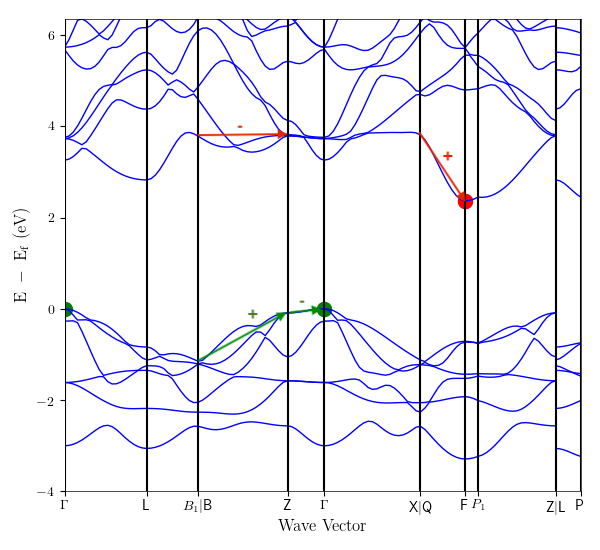

In [512]:
# Représentation graphique
print("La figure suivante représente les pentes minimales (-) et maximales (+) de la dernière bande de valence et de la première bande de conduction, repectivement en vert et rouge.")
display(band)

# 3. Masse effective

On cherche à calculer la masse effective au sommet de la bande de valence et à la base de la bande de conduction. Puisque nous supposons une dispersion parabolique, une fois la valeur du sommet (ou de la base) trouvée, on détermine un point proche. On peut alors approximer une parabole.
Avec la formule suivante et l'équation de la parabole, on peut déterminer la masse effective :

$$\big(\frac{1}{m^*_e}\big)_{ij} = \big(\frac{1}{\hbar^2}\big)\big(\frac{\delta^2\epsilon}{\delta k_i\delta k_j}\big) $$

In [513]:
# Parabole au sommet de la dernière bande de valence
ys = -10
yb = 10
for i in range (1,9):
    s = data.get("energy")[i].get("1")[14][0]
    b = data.get("energy")[i].get("1")[15][0]
    if (s>ys):
        ys = s
        ref = i
        xs = a[i]
    if (b<yb):
        yb = b
        ref2 = i
        xb = a[i]
    i = i+1
print("Pour commencer, nous calculons les coordonnées du sommet de la dernière bande de valence, correspondant au point vert sur le graphe de la section 2 : (xs,ys) = (",xs,",",ys,")")
print("On prend un point proche de la base ou du sommet pour approximer par une parabole :")
xs2 = data['distances'][ref-1][0]
ys2 = data.get("energy")[ref-1].get("1")[14][0]
xs3 = data['distances'][ref+1][0]
ys3 = data.get("energy")[ref+1].get("1")[14][0]

# Avec les deux points proches de notre sommet, on extrapole une parabole.
xval = [xs2,xs,xs3]
yval = [ys2,ys,ys3]
print(xval,yval)
xval_fit = np.polyfit(xval,yval,2)
xval_abs = np.linspace(xs-0.5,xs+1,1000)
yval_ord = xval_fit[0]*xval_abs**2 + xval_fit[1]*xval_abs + xval_fit[2]
print("Avec les deux points, on approxime une parabole ax^2+bx+c de paramètres [a, b, c] = ", xval_fit)


Pour commencer, nous calculons les coordonnées du sommet de la dernière bande de valence, correspondant au point vert sur le graphe de la section 2 : (xs,ys) = ( 2.880981432736445 , -9.999999999998899e-05 )
On prend un point proche de la base ou du sommet pour approximer par une parabole :
[2.4713620080499967, 2.880981432736445, 3.9450507207568037] [-0.08919999999999995, -9.999999999998899e-05, -1.1248999999999998]
Avec les deux points, on approxime une parabole ax^2+bx+c de paramètres [a, b, c] =  [-0.86489975  4.84675949 -6.78480945]


In [514]:
# Parabole à la base de la première bande de conduction
yb = 10
for i in range (1,9):
    b = data.get("energy")[i].get("1")[15][0]
    if (b<yb):
        yb = b
        ref2 = i
        xb = a[i]
    i = i+1
print("Pour commencer, nous calculons les coordonnées de la base de la première bande de conduction, correspondant au point rouge sur le graphe de la section 2 : (",xb,",",yb,")")
print("On prend un point proche de la base pour approximer par une parabole :")
xb2 = data['distances'][ref2-1][0]
yb2 = data.get("energy")[ref2-1].get("1")[15][0]
xb3 = data['distances'][ref2+1][0]
yb3 = data.get("energy")[ref2+1].get("1")[15][0]

# Avec les deux points proches de notre sommet, on extrapole une parabole.
xcond = [xb2,xb,xb3]
ycond = [yb2,yb,yb3]
print(xval,yval)
xcond_fit = np.polyfit(xcond,ycond,2)
xcond_abs = np.linspace(xb-0.5,xb+0.5,1000)
ycond_ord = xcond_fit[0]*xcond_abs**2 + xcond_fit[1]*xcond_abs + xcond_fit[2]
print("Avec les deux points, on approxime une parabole ax^2+bx+c de paramètres [a, b, c] = ", xcond_fit)


Pour commencer, nous calculons les coordonnées de la base de la première bande de conduction, correspondant au point rouge sur le graphe de la section 2 : ( 4.441239089049648 , 2.3680000000000003 )
On prend un point proche de la base pour approximer par une parabole :
[2.4713620080499967, 2.880981432736445, 3.9450507207568037] [-0.08919999999999995, -9.999999999998899e-05, -1.1248999999999998]
Avec les deux points, on approxime une parabole ax^2+bx+c de paramètres [a, b, c] =  [  5.45468106 -48.65250443 110.85397699]


<Figure size 432x288 with 0 Axes>

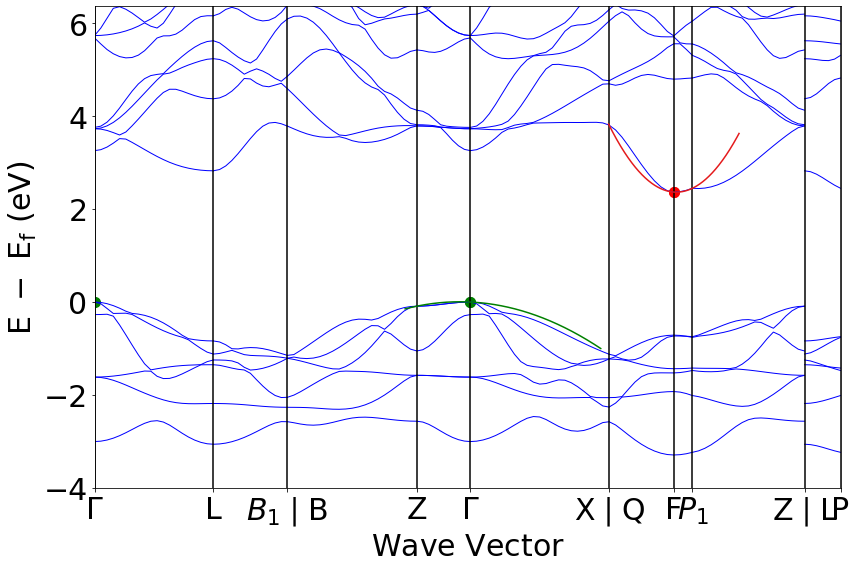

In [506]:
#Représentation graphique des paraboles
plt.figure("0")
bsp.get_plot(vbm_cbm_marker=True)
plt.plot(xval_abs,yval_ord,'g')
plt.plot(xcond_abs,ycond_ord)
plt.show()

In [525]:
# Calcul de la masse effective au sommet de la dernière bande de valence
# On calcule la dérivée seconde de l'énergie. Elle correspond à la dérivée seconde de la parabole calculée précédemment,
# c'est-à-dire 2a.
hbar = 6.626*10**(-34)
dsecv = 2*xval_fit[0] #dérivée seconde exprimée en [eV/Ansgtrom^2]
dsecv2 = (dsecv * (1.602*10**(-19)))/10*10**2 # dérivée seconde exprimée en [J/m]
mev = (hbar**2)/dsecv2
print("La masse effective au sommet de la dernière bande de valence vaut :",mev,"[J/m]")

# Calcul de la masse effective à la base de la première bande de conduction
# On calcule la dérivée seconde de l'énergie. Elle correspond à la dérivée seconde de la parabole calculée précédemment,
# c'est-à-dire 2a.
hbar = 6.626*10**(-34)
dsecc = 2*xcond_fit[0] #dérivée seconde exprimée en [eV/Ansgtrom^2]
dsecc2 = (dsecc * (1.602*10**(-19)))/10*10**2 # dérivée seconde exprimée en [J/m]
mec = (hbar**2)/dsecc2
print("La masse effective à la base de la première bande de conduction vaut :",mec,"[J/m]")




La masse effective au sommet de la dernière bande de valence vaut : -1.5843261238538351e-49 [J/m]
La masse effective à la base de la première bande de conduction vaut : 2.5121235412023697e-50 [J/m]
